In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Dataset Description

The data is taken from "https://www.kaggle.com/imakash3011/customer-personality-analysis"

The dataset for this project is provided by __Dr. Omar Romero-Hernandez__.

## Content

### Attributes

#### People

- __ID__: Customer's unique identifier
- __Year_Birth__: Customer's birth year
- __Education__: Customer's education level
- __Marital_Status__: Customer's marital status
- __Income__: Customer's yearly household income
- __Kidhome__: Number of children in customer's household
- __Teenhome__: Number of teenagers in customer's household
- __Dt_Customer__: Date of customer's enrollment with the company
- __Recency__: Number of days since customer's last purchase
- __Complain__: 1 if the customer complained in the last 2 years, 0 otherwise
  
#### Products

- __MntWines__: Amount spent on wine in last 2 years
- __MntFruits__: Amount spent on fruits in last 2 years
- __MntMeatProducts__: Amount spent on meat in last 2 years
- __MntFishProducts__: Amount spent on fish in last 2 years
- __MntSweetProducts__: Amount spent on sweets in last 2 years
- __MntGoldProds__: Amount spent on gold in last 2 years

#### Promotion

- __NumDealsPurchases__: Number of purchases made with a discount
- __AcceptedCmp1__: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- __AcceptedCmp2__: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- __AcceptedCmp3__: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- __AcceptedCmp4__: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- __AcceptedCmp5__: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- __Response__: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- __NumWebPurchases__: Number of purchases made through the company’s website
- __NumCatalogPurchases__: Number of purchases made using a catalogue
- __NumStorePurchases__: Number of purchases made directly in stores
- __NumWebVisitsMonth__: Number of visits to company’s website in the last month

# Objectives

## To perform customer segmentation

We take the following steps

- Clean our data and perform the __EDA__
- __Feature engineering__
- __PCA__ to reduce the dimensionality
- __KMeans__ to cluster our data
- __Customer Profiling__ based on the clusters

# Loading Data

In [2]:
data=pd.read_csv("marketing_campaign.csv",delimiter='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print("Data has\033[1m" , data.shape[0] , "\033[0mrows and\033[1m", data.shape[1] , "\033[0mcolumns")

Data has 2240 rows and 29 columns


In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
data_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(data.columns)):
    data_info.loc[i] = [data.columns[i],
                        data[data.columns[i]].isnull().sum(),
                        data[data.columns[i]].dtypes,
                        data[data.columns[i]].nunique()] 
    
data_info

,Name of Col,Num of Null,Dtype,N_Unique
0,ID,0,int64,2240
1,Year_Birth,0,int64,59
2,Education,0,object,5
3,Marital_Status,0,object,8
4,Income,24,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,object,663
8,Recency,0,int64,100
9,MntWines,0,int64,776


*Important Note:* 

The columns __Z_CostContact and Z_Revenue__ have same value for each row of our dataset and therefore do not provide any information.\
We __drop these along with the ID column__

In [7]:
data.drop(labels=['ID','Z_CostContact','Z_Revenue'],axis=1,inplace=True)

The __Dt_Customer__ is interpreted as object , hence we __convert it into datetime__ to draw any meaningful insights.\
We also create two new columns months and year derived from the newly converted datetime to add more information

In [8]:
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'],format='%d-%m-%Y')

In [9]:
data['month']=pd.DatetimeIndex(data['Dt_Customer']).month
data['year']=pd.DatetimeIndex(data['Dt_Customer']).year

The Income column contains some missing values which we will resolve later.\
There are no duplicates in the data

# EDA + Feature Engineering

Text(0.5, 1.0, 'Distribution of Birth Year')

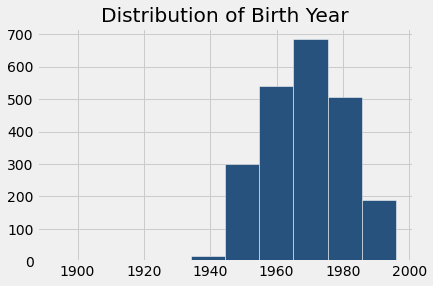

In [10]:
plt.hist(x=data['Year_Birth'],edgecolor='white',bins=10,color='#26527D')
plt.title('Distribution of Birth Year')

We observe that their are three outliers ,with birth year<=1900 , we replace them with mean values of our age for better clustering.

In [11]:
data.loc[data['Year_Birth']<=1900,'Year_Birth']=np.round(data['Year_Birth'].mean()).astype(int)

Instead of using Birth Year we can derive the age from it and use it in our analysis.

In [12]:
data['Age'] = 2021-data['Year_Birth']

Text(0.5, 1.0, 'Distribution of Age')

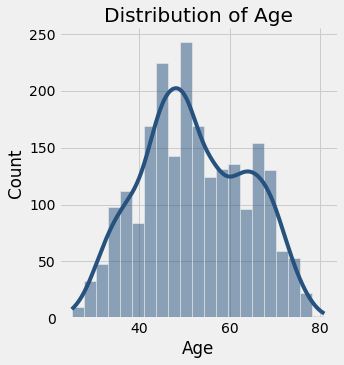

In [13]:
sns.displot(data=data,x='Age',kde=True,color='#26527D')
plt.title('Distribution of Age')

In [14]:
print("The Age looks \033[1mnormally distributed\033[0m and ranges between:\033[1m" ,data['Age'].min(), "-" ,data['Age'].max() ,"years ")

The Age looks normally distributed and ranges between: 25 - 81 years 


The age looks normally distributed  

(array([240., 216., 235., 217., 229., 223., 236., 201., 225., 218.]),
 array([15551. , 15620.9, 15690.8, 15760.7, 15830.6, 15900.5, 15970.4,
        16040.3, 16110.2, 16180.1, 16250. ]),
 <BarContainer object of 10 artists>)

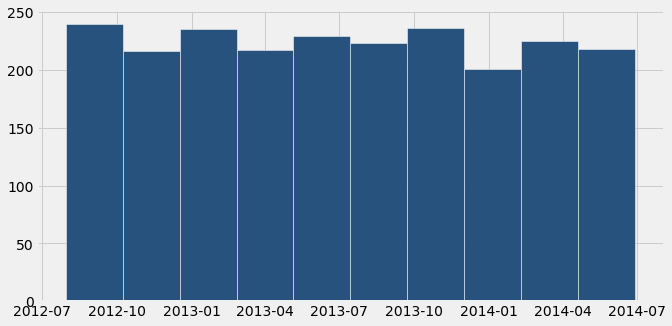

In [15]:
plt.figure(figsize=(10,5))
plt.hist(x=data['Dt_Customer'],edgecolor='white',color='#26527D')

In [16]:
print("The Dt_Customer is\033[1m uniformly distributed\033[0m and ranges between:\033[1m" ,data['Dt_Customer'].min(), "-" ,data['Dt_Customer'].max())

The Dt_Customer is uniformly distributed and ranges between: 2012-07-30 00:00:00 - 2014-06-29 00:00:00


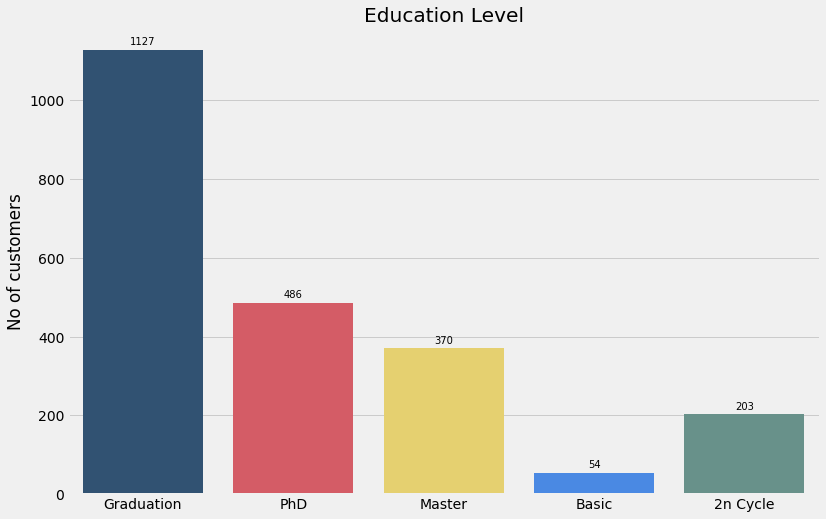

In [17]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(12,8))
plots=sns.countplot(x='Education',data=data,palette=color)
plt.ylabel('No of customers')
plt.title('Education Level')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

Looks like our customers are __divided evely between graduates and post graduates__ with a very small proportion having only basic education

In [18]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We note that their are 7 entries which don't make any sense (Alone,YOLO,Absurd).\
I map them into "Single" category although they could just be dropped or labelled as NaN.

In [19]:
data.loc[(data['Marital_Status'] =='YOLO')|(data['Marital_Status'] =='Absurd')|(data['Marital_Status'] =='Alone'),'Marital_Status']='Single'

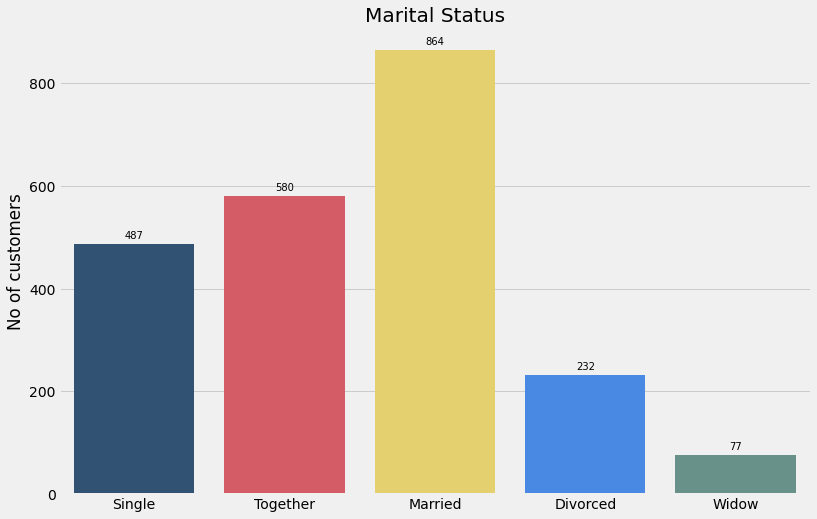

In [20]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(12,8))
plots=sns.countplot(x='Marital_Status',data=data,palette=color)
plt.ylabel('No of customers')
plt.title('Marital Status')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

We can now create some new features based on the data we have before futher analysis
- __Are they Parents__ or Not based on No of childrens they have 
- __Are they in a relationship__ or not based on the Marital Status

In [21]:
data['is_parent']= data['Kidhome']+ data['Teenhome'] !=0

Text(0.5, 1.0, 'Are they parents')

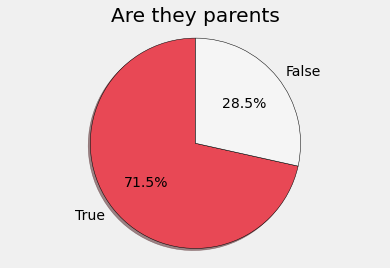

In [22]:
fig , ax = plt.subplots()
sizes = data['is_parent'].value_counts()
labels = 'True', 'False' 
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'black'},
        colors=['#E84855','#F5F5F5'])
ax.axis('equal')
ax.set_title('Are they parents')

We can see that majority of our customers are parents 

In [23]:
#Helper function
def transform(x):
    if x == 'Together' or x=='Married':
        return 'Relationship'
    else:
        return 'Alone'

In [24]:
data['status'] = data['Marital_Status'].apply(transform)

Text(0.5, 1.0, 'Are they living alone')

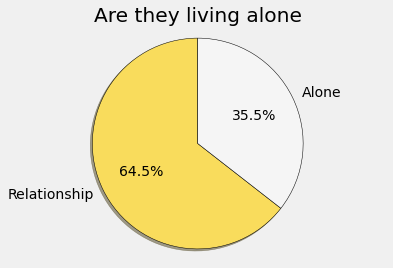

In [25]:
fig , ax = plt.subplots()
sizes = data['status'].value_counts()
labels = 'Relationship', 'Alone' 
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'black'},
        colors=['#F9DC5C','#F5F5F5'])
ax.axis('equal')
ax.set_title('Are they living alone')

We can see that majority of our customers are in a Relationship

Text(0, 0.5, 'Frequency')

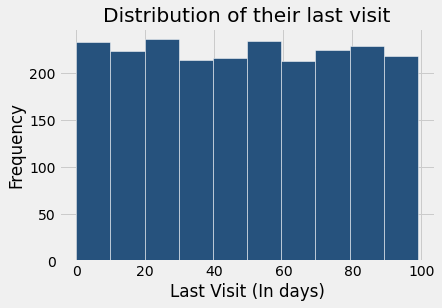

In [26]:
plt.hist(x=data['Recency'],edgecolor='white',color='#26527D')
plt.title('Distribution of their last visit')
plt.xlabel('Last Visit (In days)')
plt.ylabel('Frequency')

__Distribution of their last visit to the store in evenly distributed__

Now let's analyze the Income column.\
Note: It contains some missing values

<AxesSubplot:xlabel='Income'>

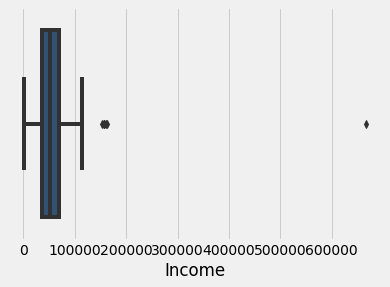

In [27]:
sns.boxplot(x='Income',data=data,color='#26527D')

We can see one clear outlier , we convert it into Nan and impute it with other missing values with the mean value

In [28]:
data.loc[data['Income']>600000,'Income']=np.nan

In [29]:
data['Income'].fillna(np.round(data['Income'].mean()),inplace=True)

<AxesSubplot:xlabel='Income'>

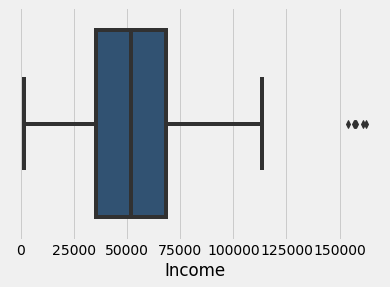

In [30]:
sns.boxplot(x='Income',data=data,color='#26527D')

We can see a normal distribution of income with a little skew due to few high values.\
We leave them as they are so to ensure that their is some diversity and keeping in mind that their can often be some irregularities in real life scenerio as well

Text(0.5, 1.0, 'Complains raised by the customer')

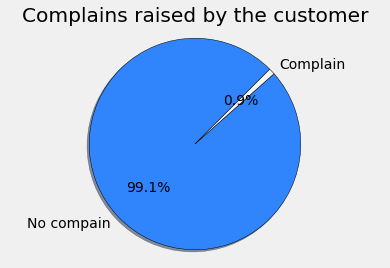

In [31]:
fig , ax = plt.subplots()
sizes = data['Complain'].value_counts() 
labels = 'No compain', 'Complain' 
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=45,wedgeprops={'edgecolor':'black'},
        colors=['#3185FC','#F5F5F5'])
ax.axis('equal')
ax.set_title('Complains raised by the customer')

We can see that proportion of people who filed a complain is even __less than 1%__. Hence this columns will also not provide any insights and we will drop it later

Now we will create some more features namely :
- __Total_Amt_Spent__ : Total amount spent by the customer 
- __Total_purchases__ : Total purchases done by the customer in last 2 years.

In [32]:
data['Total_Amt_Spent']= data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [33]:
data['Total_purchases']= data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

#### Now let's analyze Income, Expenditure and Purchases based on features we created earlier

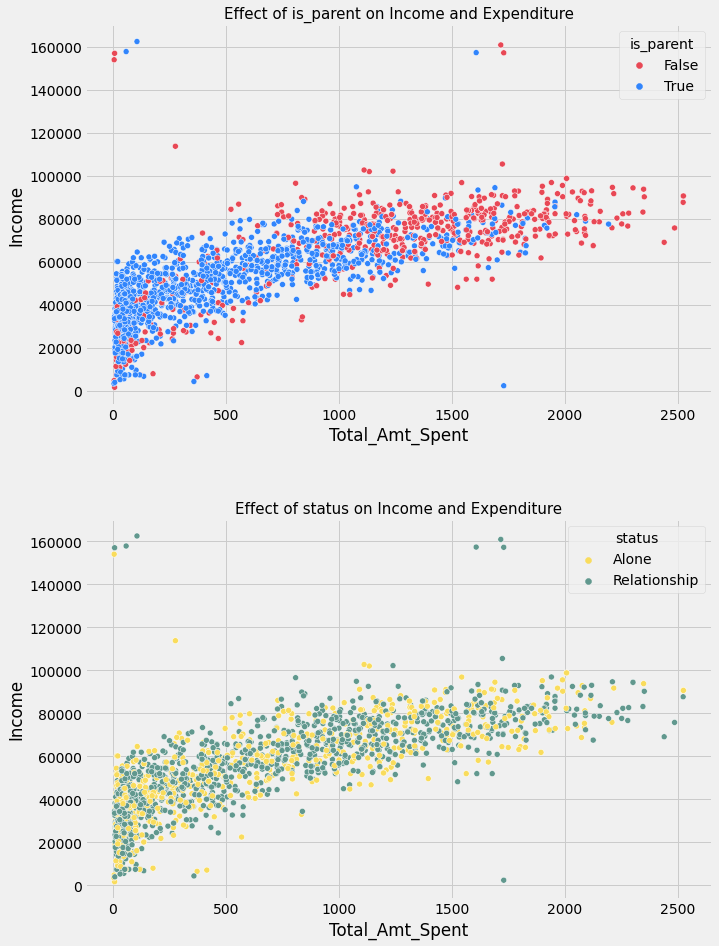

In [34]:
to_plot=['is_parent','status']
color = [['#E84855','#3185FC'],['#F9DC5C','#61988E']]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 15))
axes = axes.flatten()
for col, ax,co in zip(to_plot, axes,color):
    ax = sns.scatterplot(data = data, x = 'Total_Amt_Spent', y = 'Income', ax = ax,hue=col,palette=co)
    ax.set_title(f'Effect of {col} on Income and Expenditure', fontsize = 15)
    plt.subplots_adjust(hspace = 0.3)
plt.show()

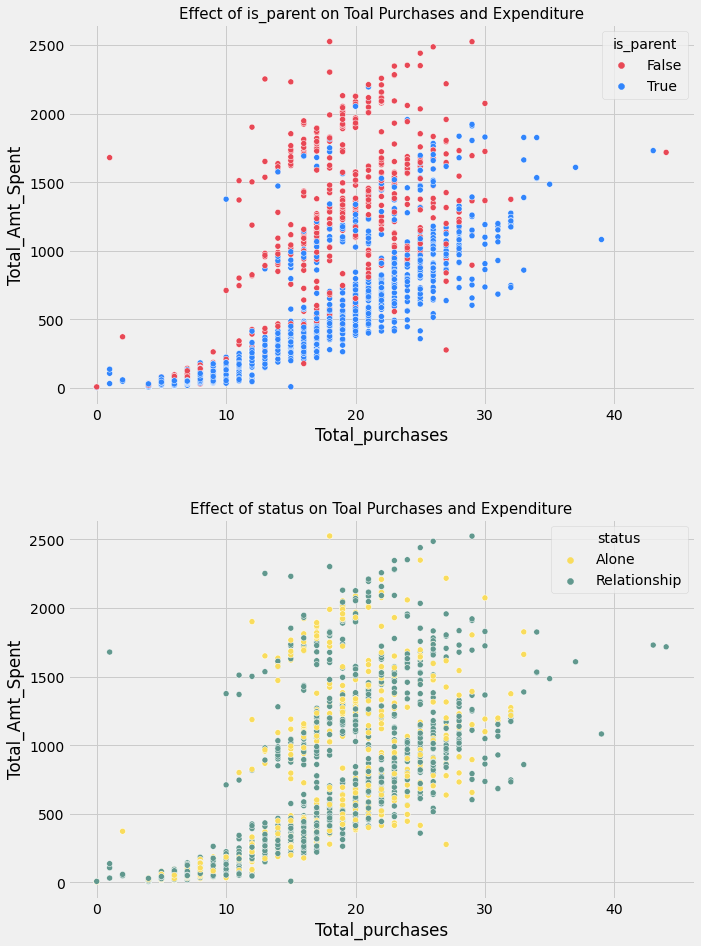

In [35]:
to_plot=['is_parent','status']
color = [['#E84855','#3185FC'],['#F9DC5C','#61988E']]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (10, 15))
axes = axes.flatten()
for col, ax,co in zip(to_plot, axes,color):
    ax = sns.scatterplot(data = data, x = 'Total_purchases', y = 'Total_Amt_Spent', ax = ax,hue=col,palette=co)
    ax.set_title(f'Effect of {col} on Toal Purchases and Expenditure', fontsize = 15)
    plt.subplots_adjust(hspace = 0.3)
plt.show()

From the above Graphs we observe the following:
- There is positive correlation between Income and Total Amount Spent and __people with higher income tends to spend more__.
- Customers __who are not parents generally have higher income and have spent more money__.
- Their __iving status seems to have no relation with their income or expenditure__
- There is __positive correlation between Purchases and Amount Spent__
- Again those who are __not parents have made more purchases__ 
- __Living status has no relation with Total Purchases as well__

#### Now let's analyze the affect of education level on various factors

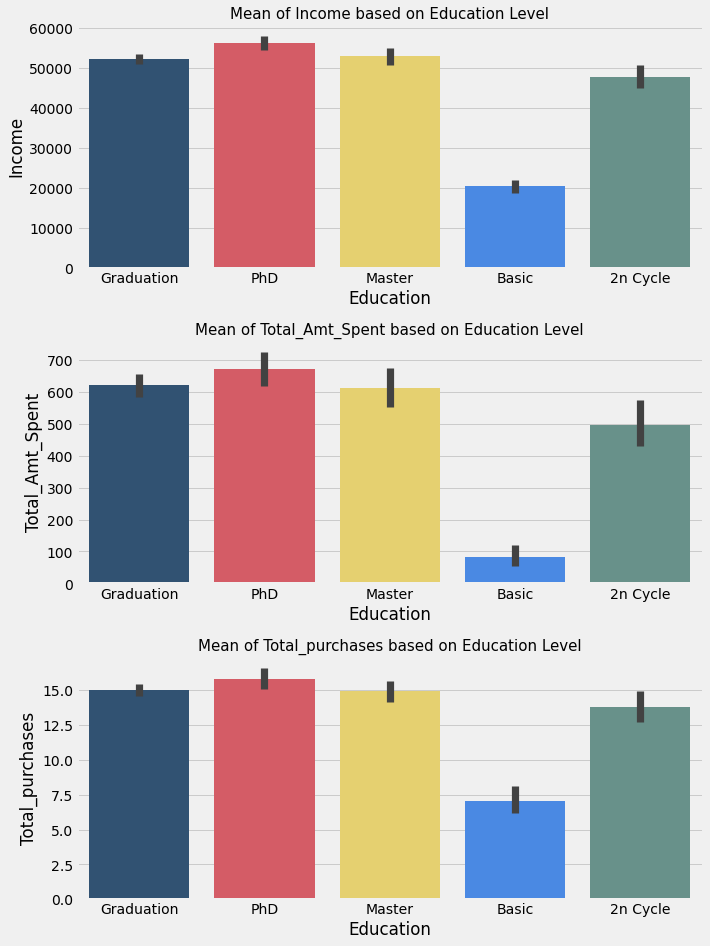

In [36]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
to_plot=['Income','Total_Amt_Spent','Total_purchases']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10, 15))
axes = axes.flatten()
for col, ax in zip(to_plot, axes):
    ax = sns.barplot(data = data, x = 'Education', y = col, ax = ax,palette=color)
    ax.set_title(f'Mean of {col} based on Education Level', fontsize = 15)
    plt.subplots_adjust(hspace = 0.3)
plt.show()

We observe the following:
- Customers with only Basic Education have the lowest income and contribute the lowest to the purchases.
- Customers with Post Graduations  tend to have higher income expenses than those with Graduation

__Now let's look at Amount spent on Individual products__

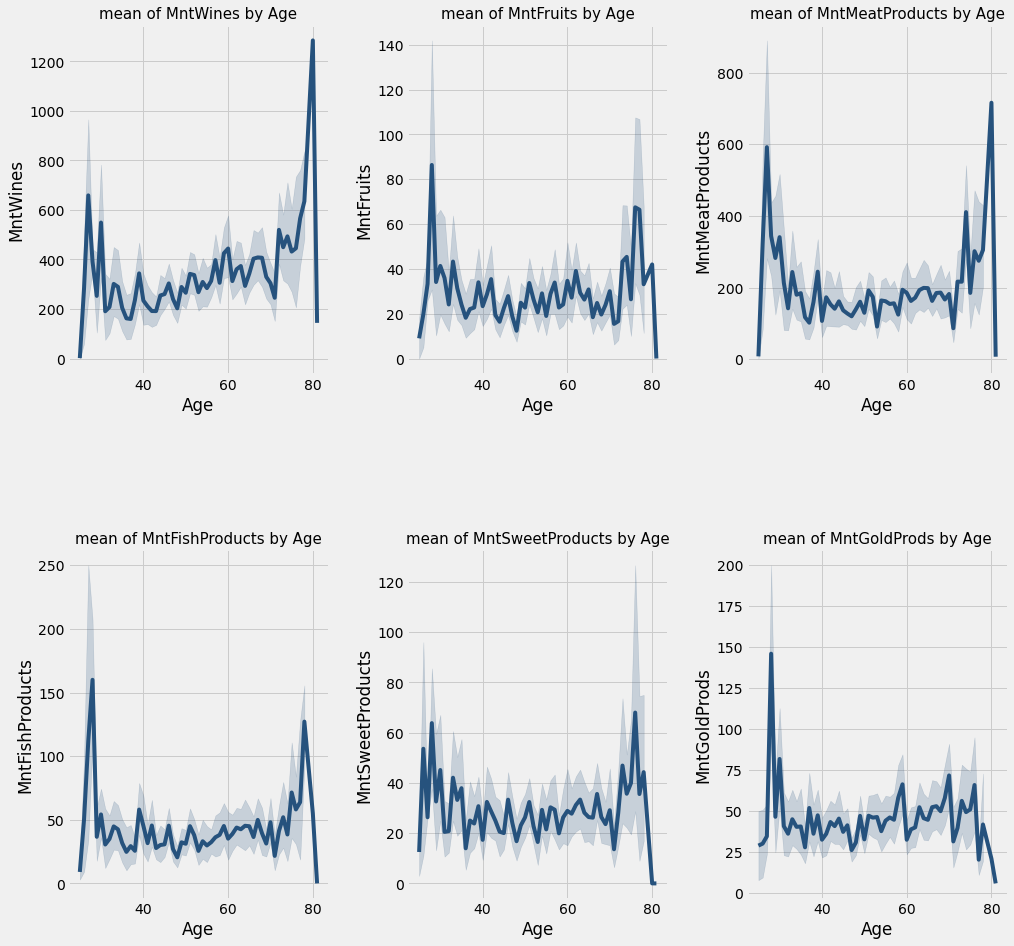

In [37]:
to_plot = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 15))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'Age', y = col, ax = ax,color='#26527D')
    ax.set_title(f'mean of {col} by Age', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
plt.show()

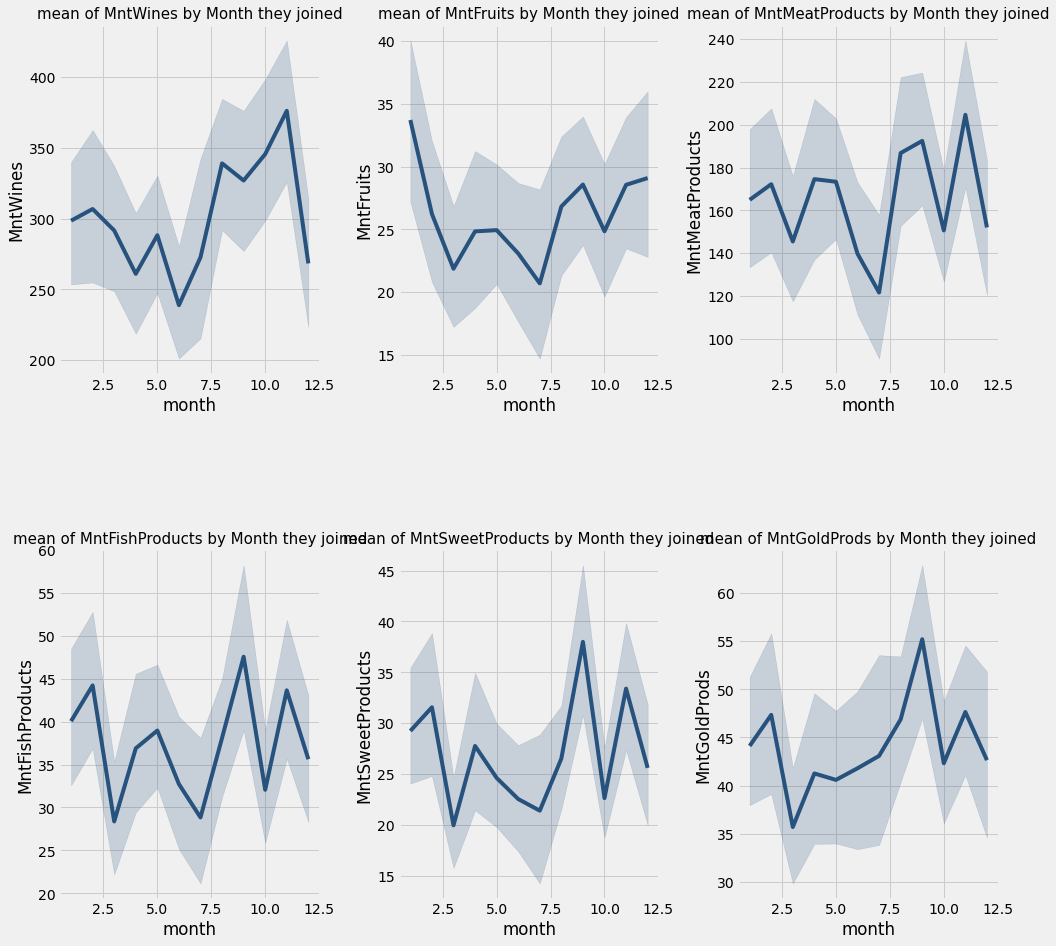

In [38]:
to_plot = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 15))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'month', y = col, ax = ax,color='#26527D')
    ax.set_title(f'mean of {col} by Month they joined', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
plt.show()

From above plots we note the following:
- __Wine is generally bought by older people__
- __Meat and Fish is mostly purchased by either younger poeple with age between 25-30 or by older people__
- __Gold is mostly bought by younger people__
- __Those who joined in Winters have bought more wine__ (Winters + old people is ideal target for selling wine)
- __Those who joined during new year month have bought more fruits__
- __Gold purchase usually peaks around Aug-Sep__

We create one last features.\
__accepted_offer__ : Total no of offers accepted by the customer

In [39]:
data['accepted_offer']= data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+ data['Response']

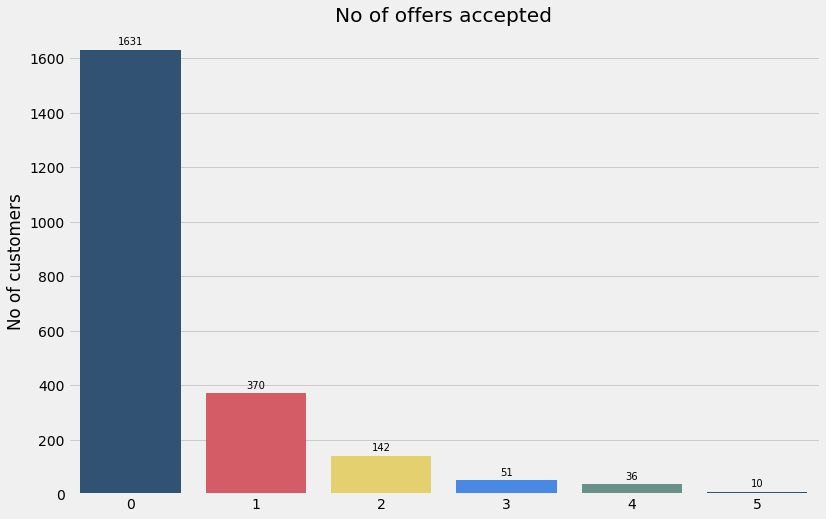

In [40]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
plt.figure(figsize=(12,8))
plots=sns.countplot(x='accepted_offer',data=data,palette=color)
plt.ylabel('No of customers')
plt.title('No of offers accepted')
plt.xlabel('')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(),),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0,8),
                       textcoords='offset points')

Majority of customers have not accepted any offers

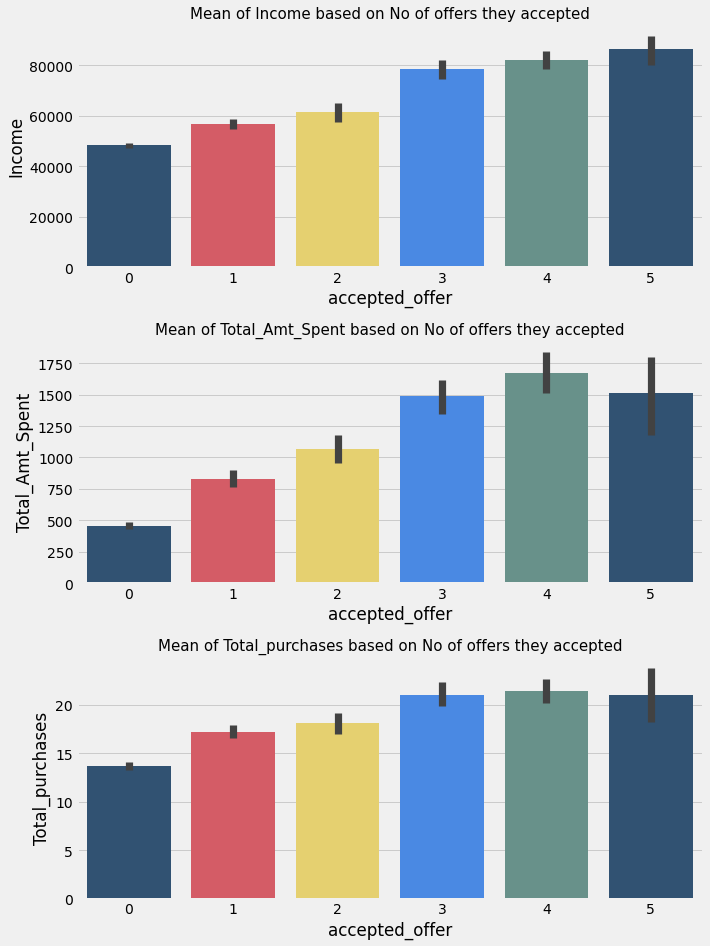

In [41]:
color=['#26527D','#E84855','#F9DC5C','#3185FC','#61988E']
to_plot=['Income','Total_Amt_Spent','Total_purchases']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (10, 15))
axes = axes.flatten()
for col, ax in zip(to_plot, axes):
    ax = sns.barplot(data = data, x = 'accepted_offer', y = col, ax = ax,palette=color)
    ax.set_title(f'Mean of {col} based on No of offers they accepted', fontsize = 15)
    plt.subplots_adjust(hspace = 0.3)
plt.show()

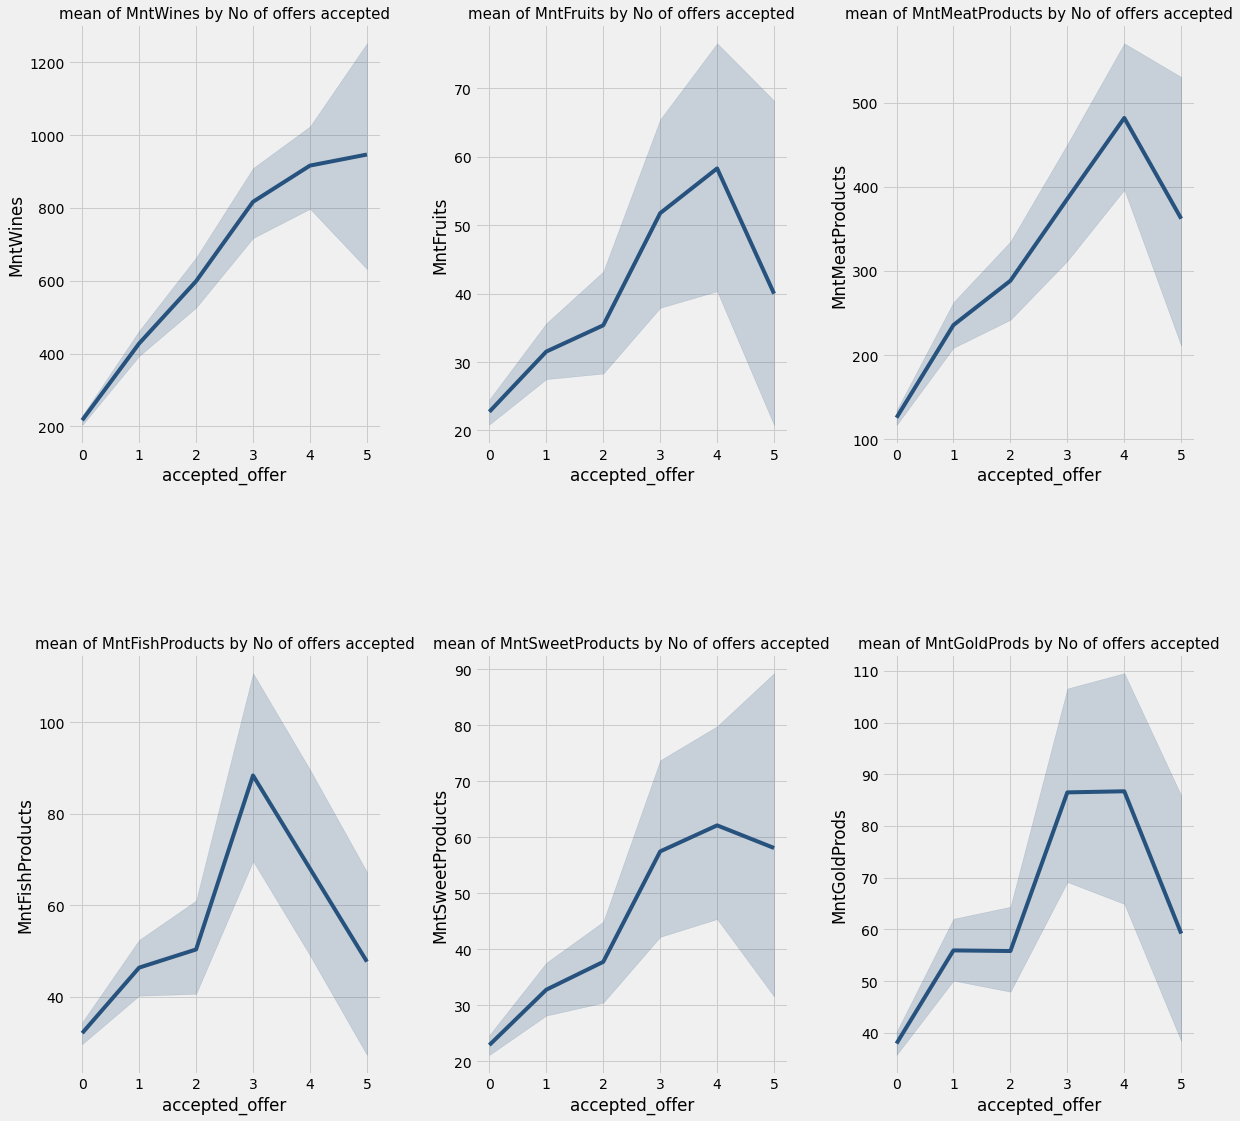

In [42]:
to_plot = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (18, 18))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'accepted_offer', y = col, ax = ax,color='#26527D')
    ax.set_title(f'mean of {col} by No of offers accepted', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)  
plt.show()

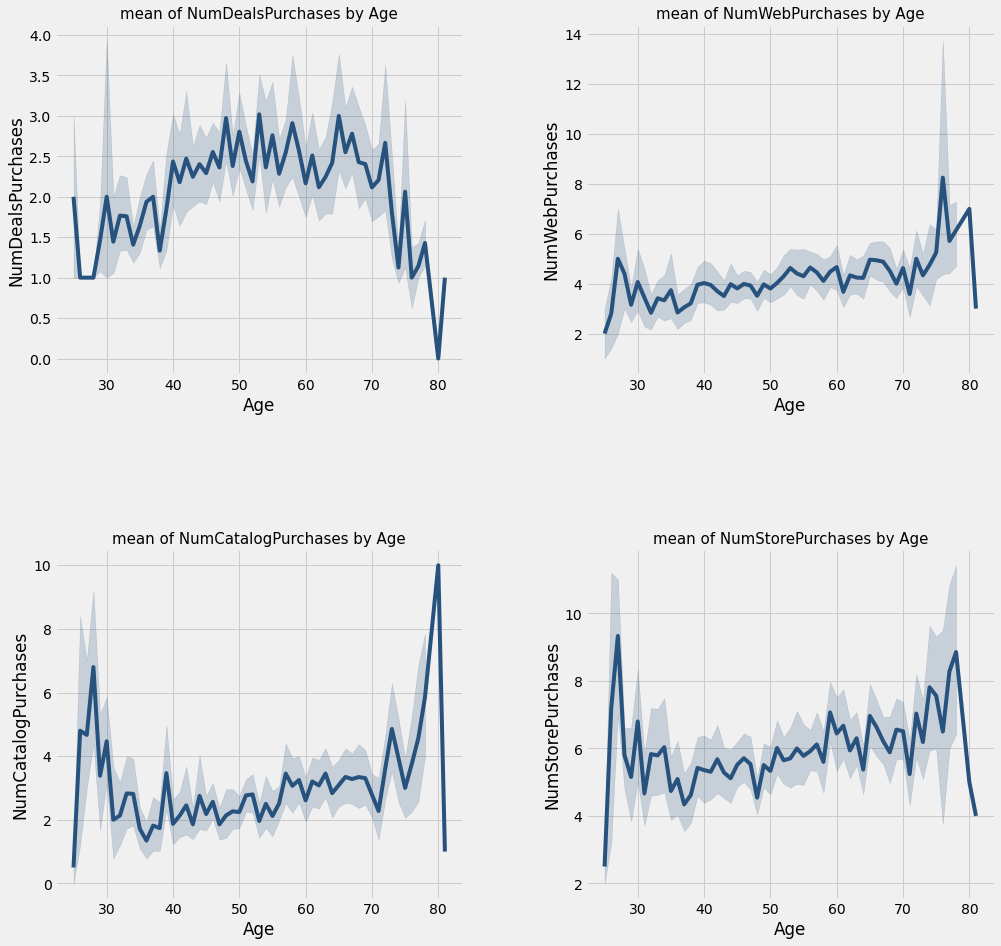

In [43]:
to_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 15))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'Age', y = col, ax = ax,color='#26527D')
    ax.set_title(f'mean of {col} by Age', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
#axes[-1].axis('off')     
plt.show()

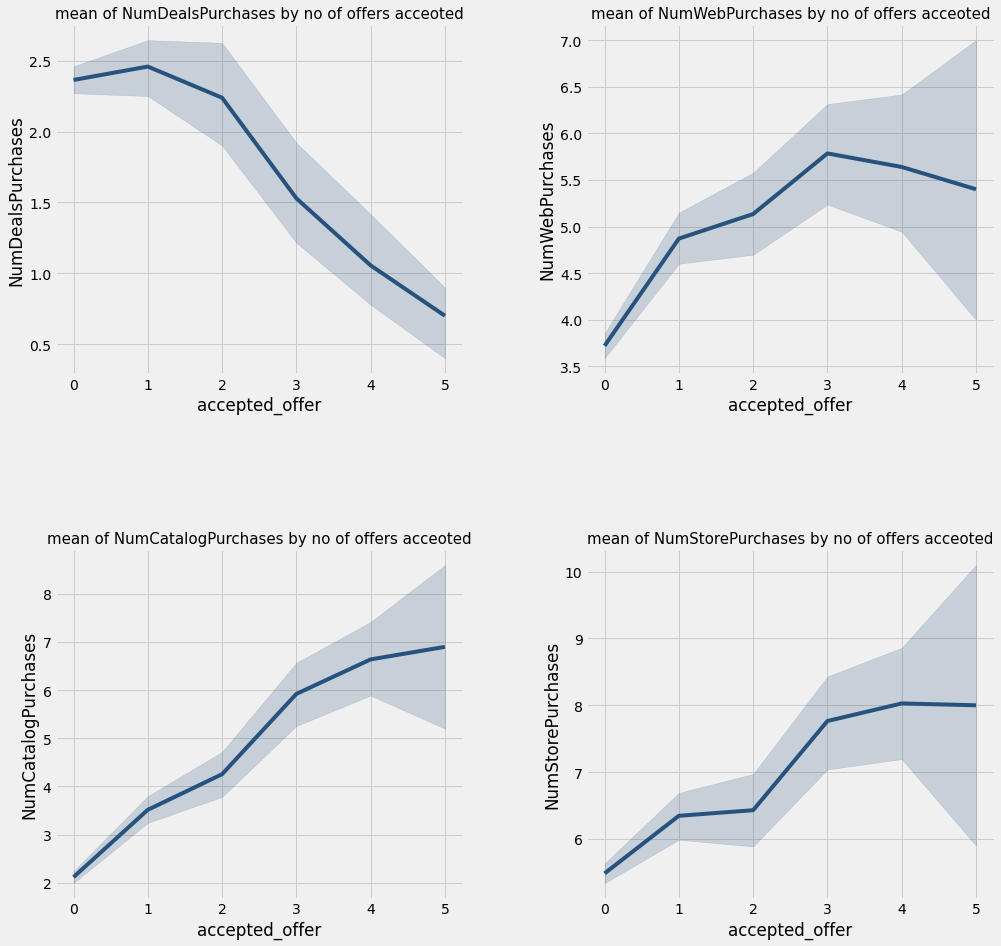

In [44]:
to_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 15))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.lineplot(data = data, x = 'accepted_offer', y = col, ax = ax,color='#26527D')
    ax.set_title(f'mean of {col} by no of offers acceoted', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)   
plt.show()

From above graphs we can interpret the following:
- __Younger generation usually purchases on deals and in store__
- __Older people generally buy using catalogs__

# PCA

Next step is to reduce the dimensionality using PCA but before that we can drop some more columns that do not provide insights such as:
- __Year_Birth__ : We will use Age instead
- __Dt_Customer and month__ : We will use year only to track when the customer joined
- __Complain__ : Less than 1% only filed complian and hence not useful for clustering
- __Marital Status and status__ : As observed earlier marital status has no effect on Income,Expenditure,Purchases etc and will only add noise to the clustering
- __AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response'__ : All info is in accepted_offer column.
- __'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'__: All info is in Total_Amt_Spent column

In [45]:
data_copy = data.drop(['Year_Birth','Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp2','AcceptedCmp5','Response','Complain','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','month','Marital_Status','status'],axis=1)

In [46]:
data_copy.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,year,Age,is_parent,Total_Amt_Spent,Total_purchases,accepted_offer
0,Graduation,58138.0,0,0,58,3,8,10,4,7,2012,64,False,1617,25,1
1,Graduation,46344.0,1,1,38,2,1,1,2,5,2014,67,True,27,6,0
2,Graduation,71613.0,0,0,26,1,8,2,10,4,2013,56,False,776,21,0
3,Graduation,26646.0,1,0,26,2,2,0,4,6,2014,37,True,53,8,0
4,PhD,58293.0,1,0,94,5,5,3,6,5,2014,40,True,422,19,0


Now we encode the Education column and is_parent column

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
data_copy['Education']= le.fit_transform(data_copy['Education'])

In [50]:
data_copy= pd.get_dummies(data_copy,drop_first=True)

We need to scale our data before PCA decompostion

In [51]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data_copy.columns:
    data_copy[col] = mms.fit_transform(data_copy[[col]]).squeeze()

In [52]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 10):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_copy)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data_copy.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.336705
2,PCA(n_components=2),0.498256
3,PCA(n_components=3),0.625143
4,PCA(n_components=4),0.717748
5,PCA(n_components=5),0.798453
6,PCA(n_components=6),0.857708
7,PCA(n_components=7),0.892219
8,PCA(n_components=8),0.92396
9,PCA(n_components=9),0.944854


In [53]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Age,Education,Income,Kidhome,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Teenhome,Total_Amt_Spent,Total_purchases,accepted_offer,is_parent,year
n,,,,,,,,,,,,,,,,
1,0.008770,0.003907,0.053490,0.119176,0.043841,0.026863,0.089049,0.019576,0.045088,0.000459,0.084730,0.117308,0.057063,0.045055,0.269723,0.015901
2,0.037454,0.032206,0.048315,0.092622,0.035411,0.034941,0.101347,0.033421,0.022566,0.004882,0.113295,0.095938,0.076658,0.026626,0.178072,0.066244
3,0.047765,0.054531,0.047468,0.083501,0.029026,0.029692,0.086685,0.025886,0.031468,0.010645,0.108155,0.074673,0.061198,0.019628,0.137163,0.152517
4,0.044521,0.052554,0.041453,0.072691,0.025701,0.026780,0.075012,0.023503,0.029746,0.109943,0.095837,0.064698,0.053551,0.025472,0.120207,0.138330
5,0.044205,0.119316,0.037014,0.069066,0.023511,0.024183,0.077273,0.022922,0.028418,0.095061,0.086754,0.058281,0.053147,0.023553,0.108444,0.128852
6,0.067458,0.102414,0.035651,0.083023,0.024075,0.024878,0.081598,0.023719,0.022961,0.077992,0.093613,0.064064,0.057000,0.030512,0.101264,0.109779
7,0.088977,0.095915,0.035585,0.097618,0.025059,0.026717,0.081710,0.021515,0.021425,0.067189,0.081611,0.066660,0.050442,0.054897,0.090306,0.094375
8,0.097583,0.083731,0.033332,0.102881,0.024136,0.030080,0.090207,0.018667,0.019684,0.060901,0.079861,0.065149,0.050259,0.076956,0.084434,0.082139
9,0.102807,0.075077,0.029852,0.104702,0.021630,0.044247,0.084037,0.016856,0.020206,0.054477,0.096186,0.060197,0.049716,0.072057,0.093518,0.074434


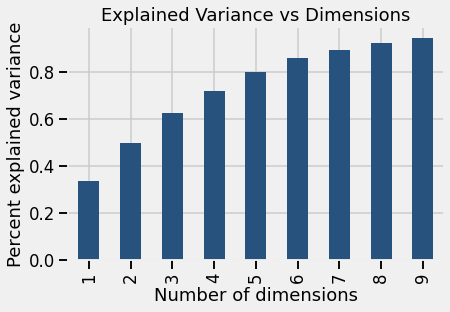

In [54]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar',color='#26527D')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

At no of dimensions= 5 explains about 79% of the data and can be chosen as an optimal value

In [55]:
pca = PCA(n_components = 5, random_state = 42)

pca.fit(data_copy)
data_pca = pd.DataFrame(pca.transform(data_copy), 
                        columns = (["PC1", "PC2", "PC3", "PC4", "PC5"]))

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2240.0,-4.485499e-18,0.559038,-0.789383,-0.454706,-0.207567,0.488893,1.219071
PC2,2240.0,9.962269e-18,0.387231,-0.968916,-0.297970,-0.031149,0.282538,1.044152
PC3,2240.0,-3.870912e-17,0.343183,-0.857042,-0.234212,-0.015825,0.231140,0.862128
PC4,2240.0,3.546270e-17,0.293179,-0.562342,-0.248799,0.004764,0.252931,0.576440
PC5,2240.0,-4.629234e-17,0.273695,-0.630631,-0.189160,0.012017,0.161229,0.901439


# Kmeans

In [56]:
from sklearn.cluster import KMeans

__Determining optimal value of n_clusters using elbow method and Silhouette method__

In [57]:
km = KMeans()

In [58]:
inertia =[]
for n in range(1,15):
    km = KMeans(n_clusters=n)
    km.fit(data_pca)
    inertia.append(km.inertia_)

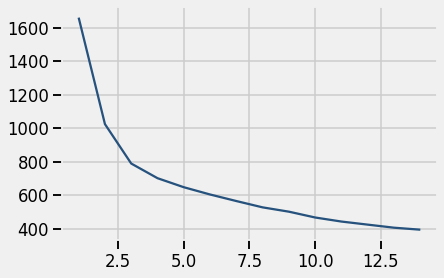

In [59]:
plt.plot(range(1,15),inertia,color='#26527D')

In [60]:
from sklearn.metrics import silhouette_score

In [61]:
def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.show()

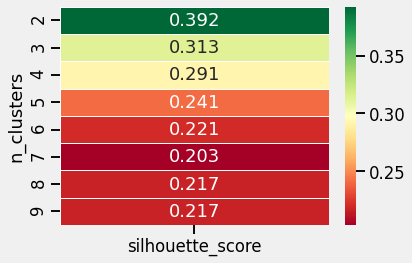

In [62]:
visualize_silhouette_layer(data_pca)

As a rule of thumb we generally takes n value with the second best silhouette score 
Therefore we choose 3 , which also aligns with the value obtained from elbow plot

In [63]:
km= KMeans(n_clusters=3)

In [64]:
km.fit(data_pca)

KMeans(n_clusters=3)

In [65]:
data['clusters']=km.labels_

In [66]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Response,month,year,Age,is_parent,status,Total_Amt_Spent,Total_purchases,accepted_offer,clusters
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,1,9,2012,64,False,Alone,1617,25,1,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,3,2014,67,True,Alone,27,6,0,2
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,8,2013,56,False,Relationship,776,21,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,2,2014,37,True,Relationship,53,8,0,2
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,1,2014,40,True,Relationship,422,19,0,2


In [67]:
cluster_color=['#292E1E','#7F0799','#037773'] #the color palette we are going to use

# Customer Profiling

<AxesSubplot:xlabel='clusters', ylabel='count'>

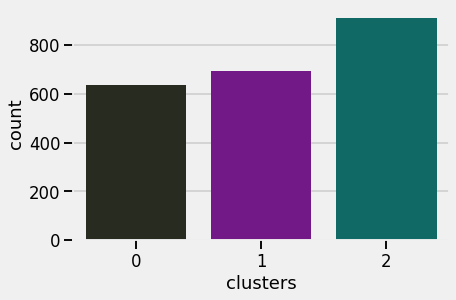

In [68]:
sns.countplot(data=data,x='clusters',palette=cluster_color)

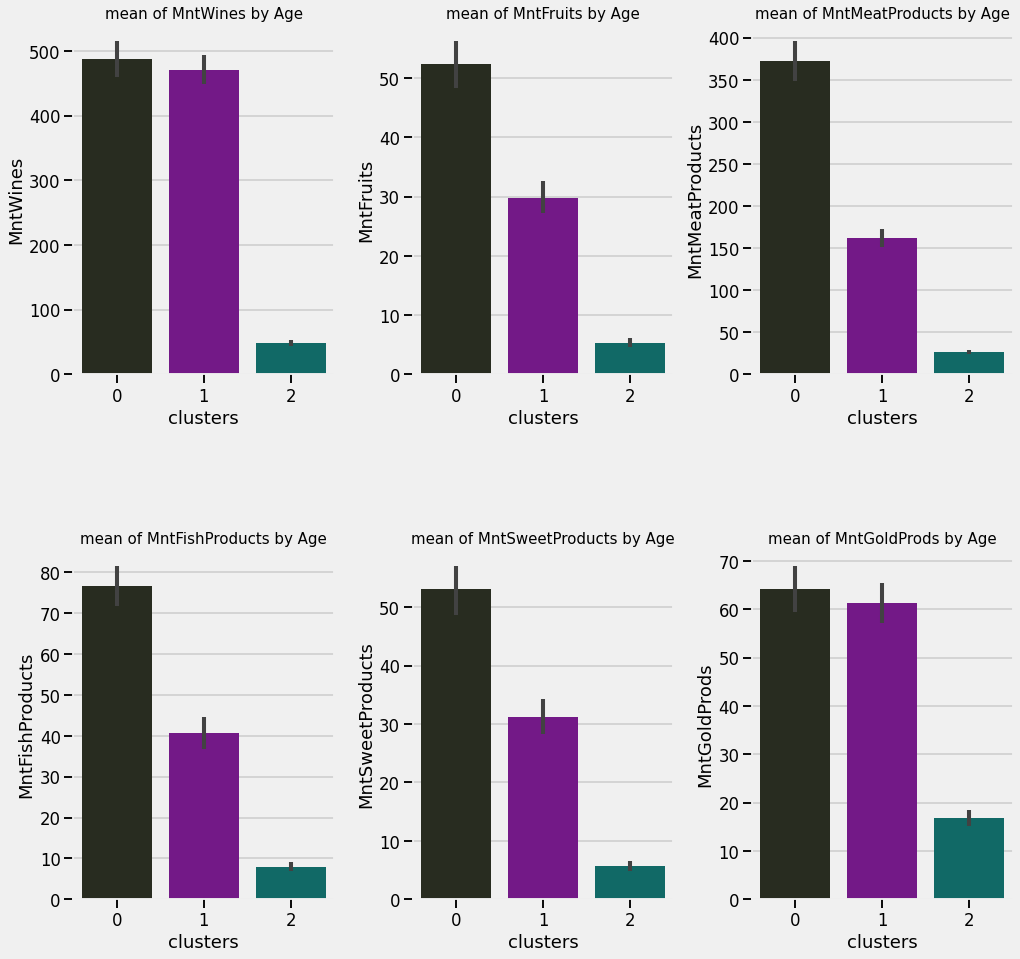

In [69]:
to_plot = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 15))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.barplot(data = data, x = 'clusters', y = col, ax = ax,palette=cluster_color)
    ax.set_title(f'mean of {col} by Age', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
plt.show()

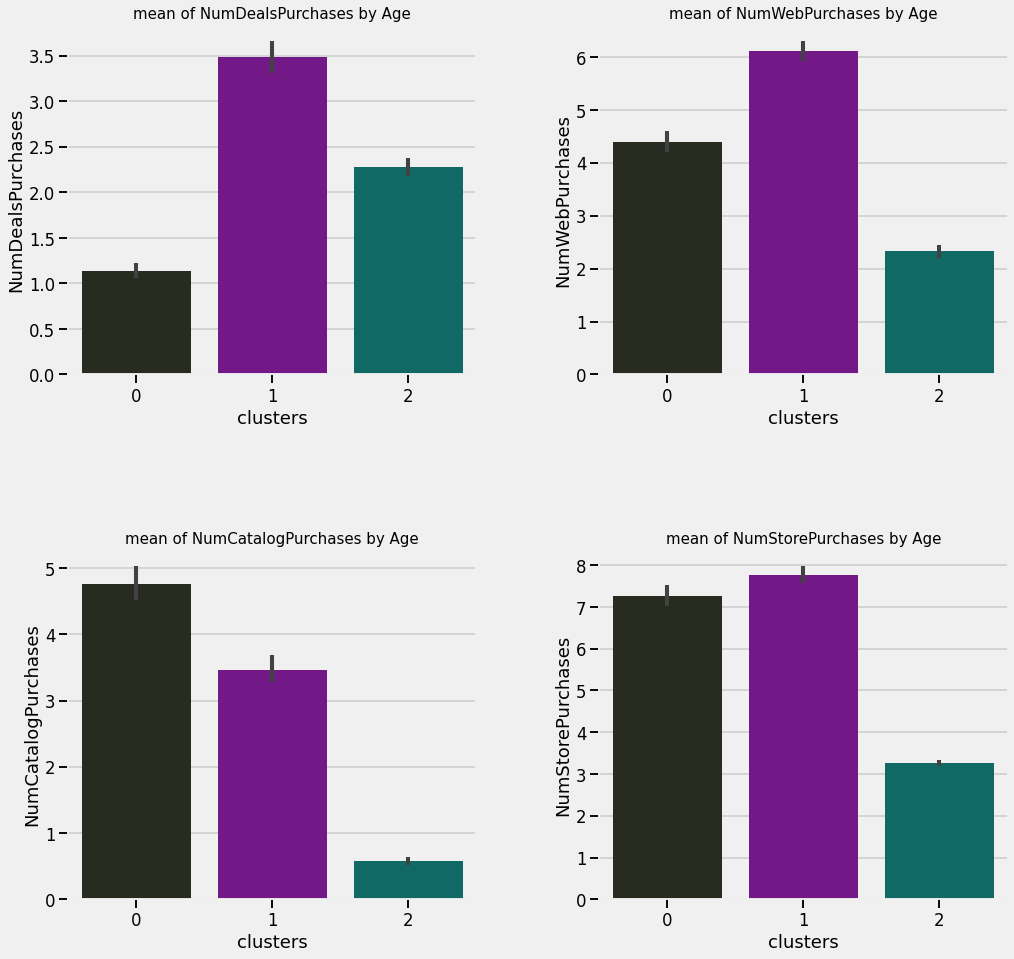

In [70]:
to_plot = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15, 15))
axes = axes.flatten()

for col, ax in zip(to_plot, axes):
    ax = sns.barplot(data = data, x = 'clusters', y = col, ax = ax,palette=cluster_color)
    ax.set_title(f'mean of {col} by Age', fontsize = 15)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    
plt.show()

Text(0.5, 1.0, 'Clustering on Total Expenditure')

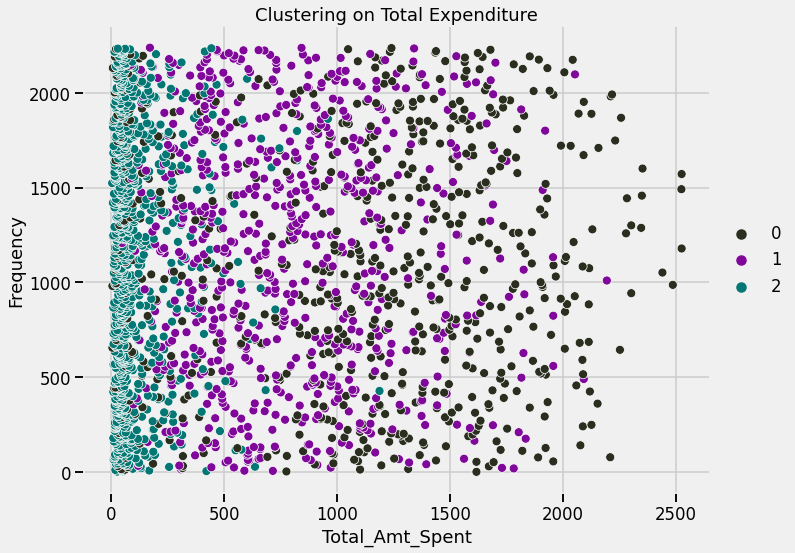

In [71]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total_Amt_Spent',y=data.index,data=data,hue='clusters',palette=cluster_color)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.ylabel('Frequency')
plt.title("Clustering on Total Expenditure")

Text(0.5, 1.0, 'Clustering on Income')

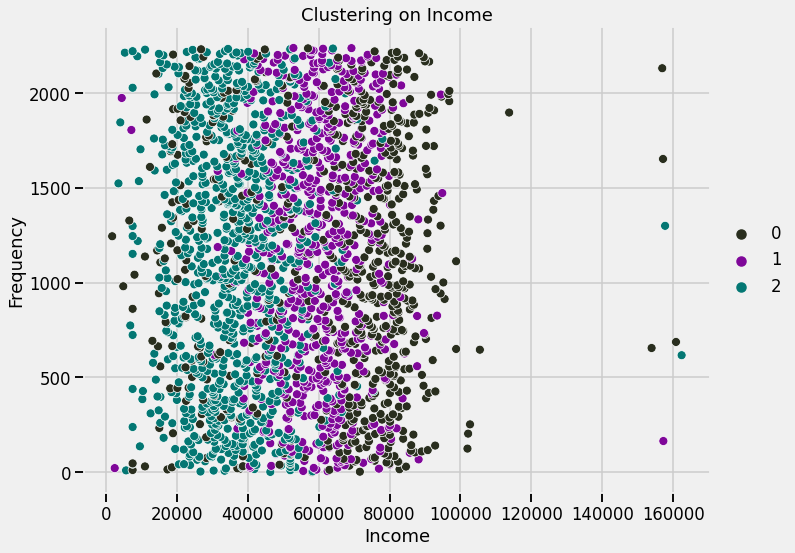

In [72]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income',y=data.index,data=data,hue='clusters',palette=cluster_color)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.ylabel('Frequency')
plt.title("Clustering on Income")

Text(0.5, 1.0, 'Clustering on Total Purchases')

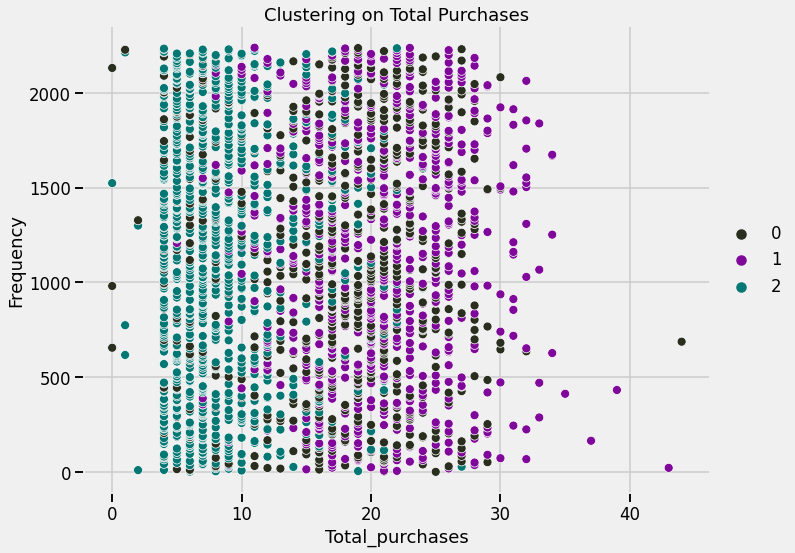

In [73]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total_purchases',y=data.index,data=data,hue='clusters',palette=cluster_color)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.ylabel('Frequency')
plt.title("Clustering on Total Purchases")

Text(0.5, 1.0, 'Clustering based on Age')

<Figure size 576x576 with 0 Axes>

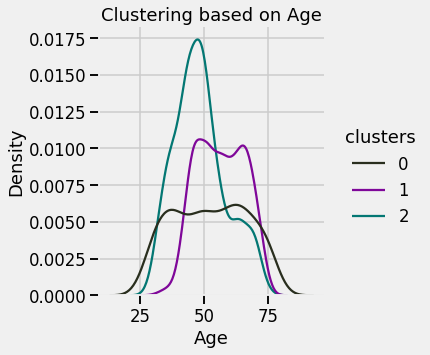

In [74]:
plt.figure(figsize=(8,8))
sns.displot(data=data,x='Age',hue='clusters',kind='kde',palette=cluster_color)
plt.title("Clustering based on Age")

<AxesSubplot:xlabel='clusters', ylabel='accepted_offer'>

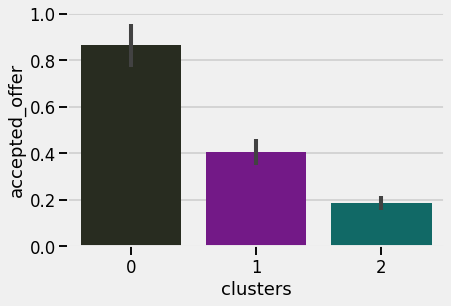

In [75]:
sns.barplot(data=data,x='clusters',y='accepted_offer',palette=cluster_color)

Text(0.5, 1.0, 'Clustering based on Education')

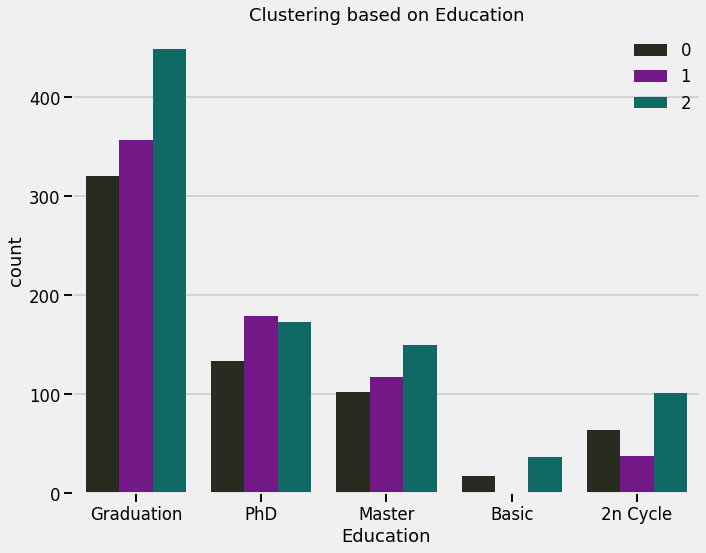

In [76]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Education',hue='clusters',palette=cluster_color)
plt.legend(bbox_to_anchor=(1.01, 1),frameon=False)
plt.title("Clustering based on Education")

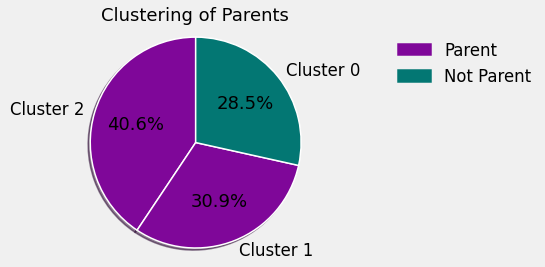

In [77]:
labels=[]
import matplotlib.patches as mpatches
fig , ax = plt.subplots()
sizes = data['clusters'].value_counts() 
for i in data['clusters'].value_counts().index:
    labels.append("Cluster "+ str(i))
ax.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90,wedgeprops={'edgecolor':'white'},
        colors=['#7F0799','#7F0799','#037773'])
ax.axis('equal')
ax.set_title('Clustering of Parents')
red_patch = mpatches.Patch(color='#7F0799', label='Are Parents')
white_patch = mpatches.Patch(color='#037773', label='Not Parents')
ax.legend(bbox_to_anchor=(1, 1),labels=['Parent','Not Parent'],handles=[red_patch,white_patch],frameon=False)

# Conclusion

## Key Findings

- We can see that the algorithm has done a god job on clustering the data and we can see three clear distinct clusters
- First we have __Cluster 0 (The rich)__ representing the non parents , their age is normally distributed and they have high income and Expenditure and they are the ones that accept majority offers 
- Next we have the parents group which are futher divided into two clusters:
- __Cluster 2 (The poor)__ , which is what majority of data is grouped into consist of those with lower income, expenditure and purchases, they have rarely accepted any offers and their age is normally distributed with mean around 45 
- __Cluster 1 (the middle class customer segment of our data)__ are the people that lies somewhere between Cluster 2 and Cluster 1 

## How to target each audience to increase revenue

- We can also see the purchases made and specific items bought by the three segments for better targeting.
- Lets focus on cluster 1 and 0 as 2 does not bring much revenue , although since they are majority they are not to be left out
- __Cluster 1__ seems to making more deal and web purchases than others and hence __lucrative offers on websites__ can be a good method to attract them .There are of interest are mostly gold and wine
- __Cluster 0__ seems to puchasing a lot more from the catalog and stores and they have brought revenue in all the items and hence __more divesity in the catalog__ can attract more customers like them 
- For __cluster 2__ although they have made less purchases , they also seems to be __influenced by the deals__ and hence they can be used to lure them out to make more purchases.

Thank you! for reading and I believe there are tons of more insights we can find using the above data and I encourage you to do so.